### Gaussian Process Regression

In [3]:
import numpy as np

def kernel_function(X1, X2, sigma, length_scale):
    """Squared Exponential Kernel function."""
    pairwise_sq_dists = np.sum(X1**2, axis=1, keepdims=True) + np.sum(X2**2, axis=1) - 2 * np.dot(X1, X2.T)
    return sigma**2 * np.exp(-0.5 * pairwise_sq_dists / length_scale**2)

def gaussian_process_regression(X_train, y_train, X_test, sigma, length_scale):
    """Gaussian Process Regression."""
    # Calculate kernel matrices
    K_train = kernel_function(X_train, X_train, sigma, length_scale)
    K_test = kernel_function(X_test, X_train, sigma, length_scale)
    
    # Perform Cholesky decomposition
    L = np.linalg.cholesky(K_train)
    
    # Solve linear equations to get weights
    alpha = np.linalg.solve(L.T, np.linalg.solve(L, y_train))
    
    # Compute mean and covariance of the posterior predictive distribution
    y_mean = np.dot(K_test, alpha)
    v = np.linalg.solve(L, K_test.T)
    y_cov = kernel_function(X_test, X_test, sigma, length_scale) - np.dot(v.T, v)
    
    return y_mean, y_cov

def evaluate_performance(y_true, y_pred):
    """Evaluate performance using MSE and R-squared."""
    mse = np.mean((y_true - y_pred)**2)
    ss_total = np.sum((y_true - np.mean(y_true, axis=0))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    r_squared = 1 - (ss_residual / ss_total)
    return mse, r_squared

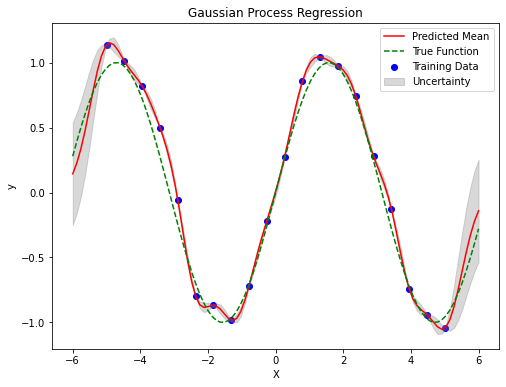

In [30]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
X_train = np.linspace(-5, 5, 20)[:, np.newaxis]
y_train = np.sin(X_train) + np.random.normal(0, 0.1, size=X_train.shape)

X_test = np.linspace(-6, 6, 100)[:, np.newaxis]
y_true = np.sin(X_test)

sigma = 0.2
length_scale = 0.5

y_mean, y_cov = gaussian_process_regression(X_train, y_train, X_test, sigma, length_scale)

mse, r_squared = evaluate_performance(y_true, y_mean)

plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_test, y_mean, color='red', label='Predicted Mean')
plt.fill_between(X_test.squeeze(), y_mean.squeeze() - 2 * np.sqrt(np.diag(y_cov)), y_mean.squeeze() + 2 * np.sqrt(np.diag(y_cov)), color='gray', alpha=0.3, label='Uncertainty')
plt.plot(X_test, y_true, color='green', linestyle='--', label='True Function')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gaussian Process Regression')
plt.legend()
plt.show()

In [33]:
print("MSE:", mse)
print("R-squared:", r_squared)

MSE: 0.010533572832584367
R-squared: 0.9796572930449206
